In [1]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib ipympl

from PIL import Image

from scipy.ndimage import convolve, correlate, uniform_filter, gaussian_filter, median_filter, rotate
from scipy.ndimage import prewitt, sobel, laplace

from skimage import filters
from skimage.data import camera
from skimage.util import random_noise
from skimage import feature

# Operadores Locales o espaciales

## Convolución y correlación

En primer lugar defiimos una imagen que consiste únicamente en un impulso discreto. Al pasarla por un filtro lineal nos proporcionará la respuesta al impulso

In [2]:
image = np.zeros((5,5), dtype='int32')
image[2,2] = 1
print(image)

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


Utilizamos un filtro cuya respuesta al impulso está definida en el array w

In [3]:
w = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(w)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


Primero vemos el resultado de la convolución

In [4]:
print(convolve(image, w))

[[0 0 0 0 0]
 [0 1 2 3 0]
 [0 4 5 6 0]
 [0 7 8 9 0]
 [0 0 0 0 0]]


Y seguidamente el de la convolución.

In [5]:
print(correlate(image, w))

[[0 0 0 0 0]
 [0 9 8 7 0]
 [0 6 5 4 0]
 [0 3 2 1 0]
 [0 0 0 0 0]]


Es muy importante ganar intuición modificando la imagen de entrada, por ejemplo, poniendo dos impulsos, haciéndola de mayor tamño (para evitar efectos de bordes),... 

## Filtro de suavizado

In [6]:
image = np.zeros((5,5))
image[2,2] = 1
print(image)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [7]:
w = (1/9)*np.ones((3,3))
print(w)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


In [8]:
print(convolve(image, w))

[[0.         0.         0.         0.         0.        ]
 [0.         0.11111111 0.11111111 0.11111111 0.        ]
 [0.         0.11111111 0.11111111 0.11111111 0.        ]
 [0.         0.11111111 0.11111111 0.11111111 0.        ]
 [0.         0.         0.         0.         0.        ]]


Existe una función específica para facilitar el filtrado

In [9]:
print(uniform_filter(image, 3))

[[0.         0.         0.         0.         0.        ]
 [0.         0.11111111 0.11111111 0.11111111 0.        ]
 [0.         0.11111111 0.11111111 0.11111111 0.        ]
 [0.         0.11111111 0.11111111 0.11111111 0.        ]
 [0.         0.         0.         0.         0.        ]]


### Ejemplos con imagenes reales

formato: TIFF
(ancho, alto) = (500, 500)
modo:  L


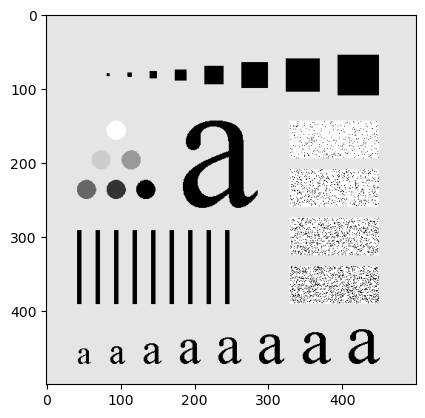

In [10]:
file = 'images/blurring_pattern.tif'
img  = Image.open(file)

print('formato:', img.format)
print('(ancho, alto) =', img.size)
print('modo: ', img.mode)

plt.imshow(img, cmap='gray')

Text(0.5, 1.0, 'Tamaño del filtro: 5')

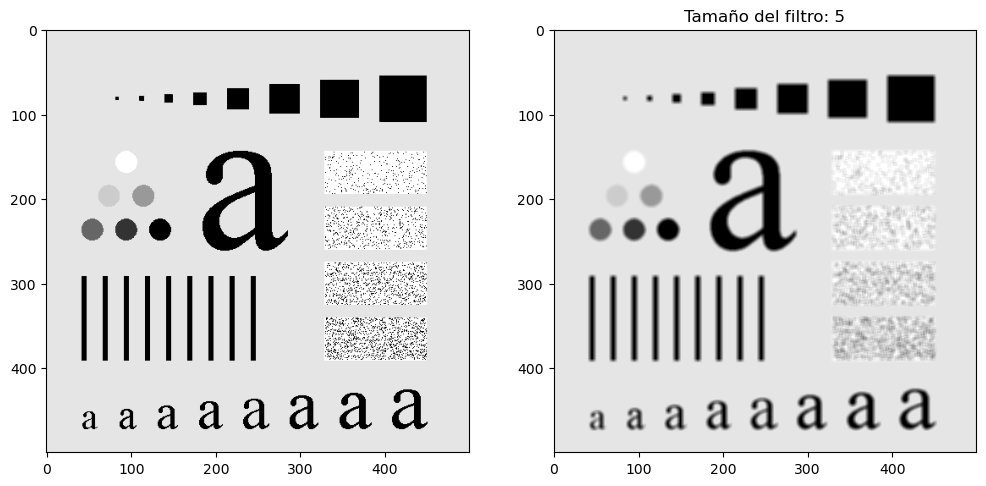

In [11]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(img, cmap='gray')
#plt.imshow(uniform_filter(img, 3), cmap='gray')
#plt.title('Tamaño del filtro: 3')

plt.subplot(122)
plt.imshow(uniform_filter(img, 5), cmap='gray')
plt.title('Tamaño del filtro: 5')

Text(0.5, 1.0, 'Tamaño del filtro: 15')

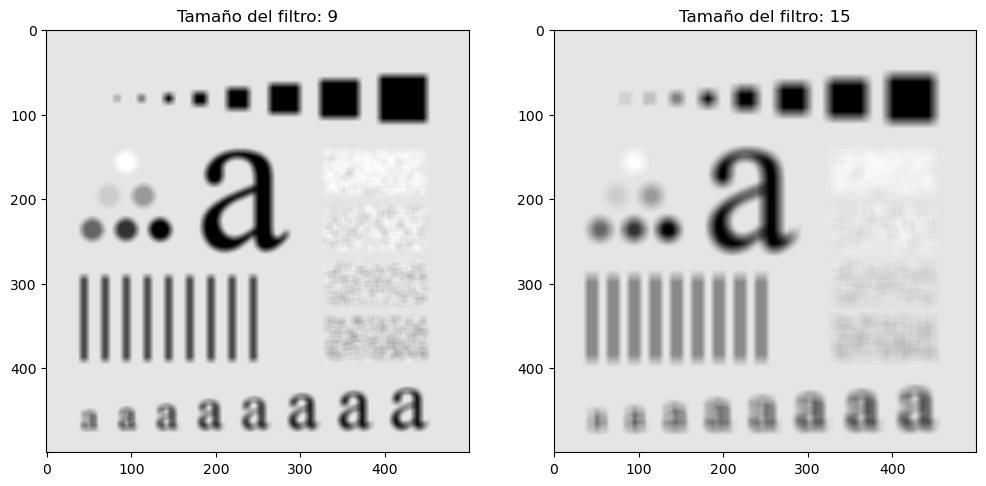

In [12]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(uniform_filter(img, 9), cmap='gray')
plt.title('Tamaño del filtro: 9')

plt.subplot(122)
plt.imshow(uniform_filter(img, 15), cmap='gray')
plt.title('Tamaño del filtro: 15')

Text(0.5, 1.0, 'Tamaño del filtro: 35')

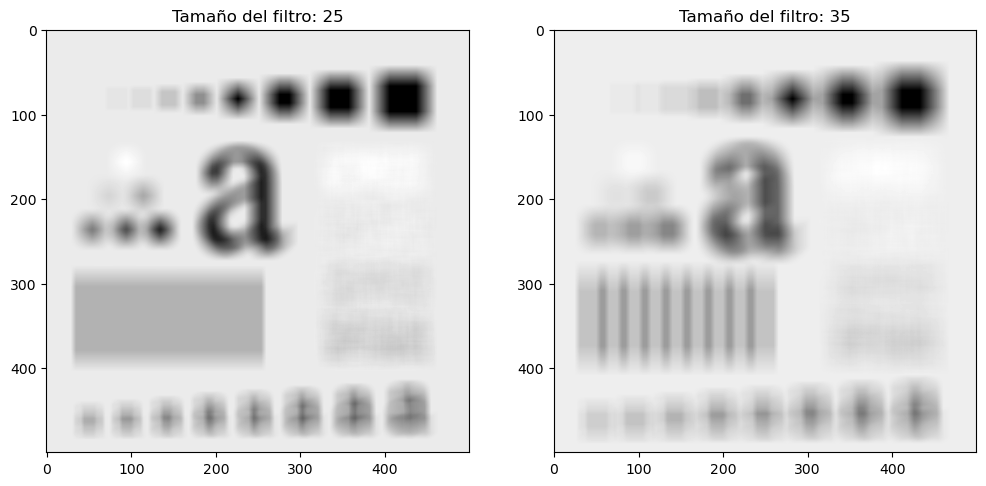

In [13]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(uniform_filter(img, 25), cmap='gray')
plt.title('Tamaño del filtro: 25')

plt.subplot(122)
plt.imshow(uniform_filter(img, 35), cmap='gray')
plt.title('Tamaño del filtro: 35')

Text(0.5, 1.0, 'Tamaño del filtro: 55')

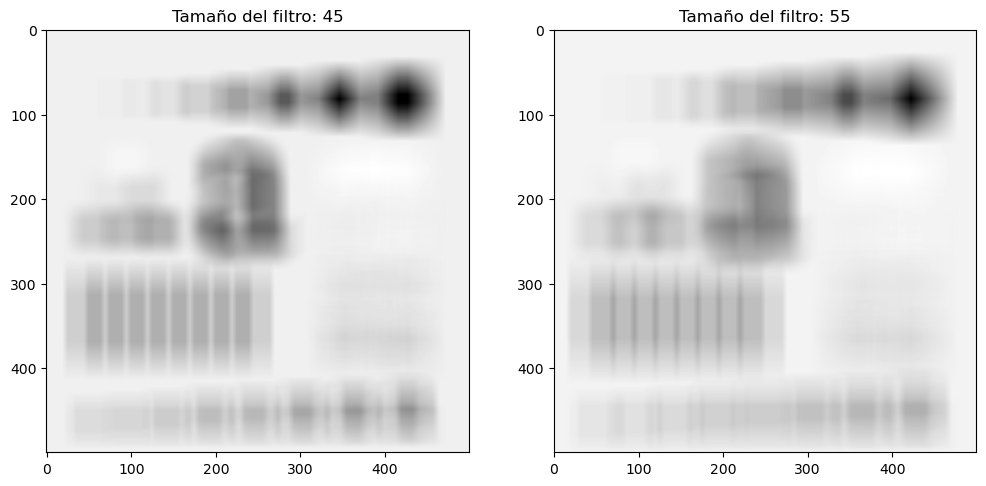

In [14]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(uniform_filter(img, 45), cmap='gray')
plt.title('Tamaño del filtro: 45')

plt.subplot(122)
plt.imshow(uniform_filter(img, 55), cmap='gray')
plt.title('Tamaño del filtro: 55')

### Filtrado Gaussiano

Se utiliza como alternativa al filtrado uniforme para reducir el rizado

Text(0.5, 1.0, 'Desviación típica: 5')

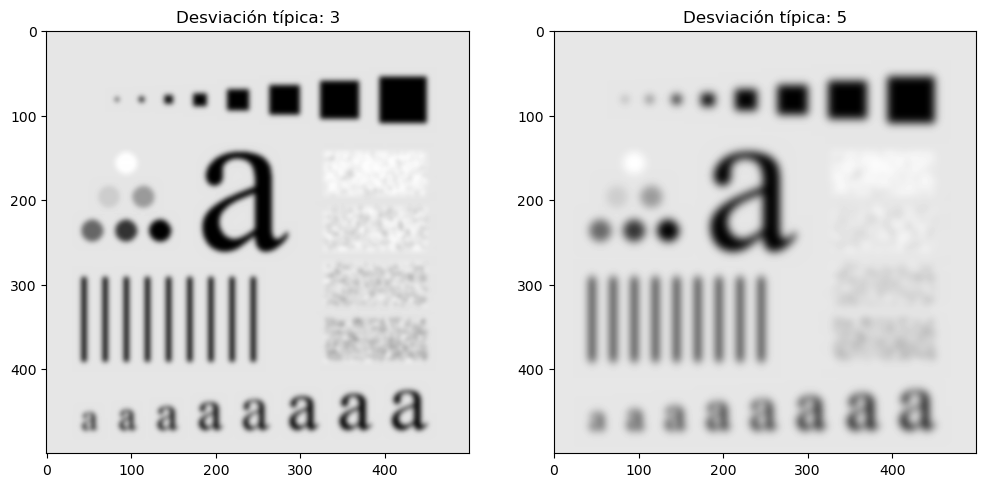

In [15]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(gaussian_filter(img, 3), cmap='gray')
plt.title('Desviación típica: 3')

plt.subplot(122)
plt.imshow(gaussian_filter(img, 5), cmap='gray')
plt.title('Desviación típica: 5')

## Ejercicio

Extraer los objetos principales de la siguiente imagen del fondo del cosmos tomada por el Observatorio Espacial Hubble

formato: TIFF
(ancho, alto) = (485, 528)
modo:  L


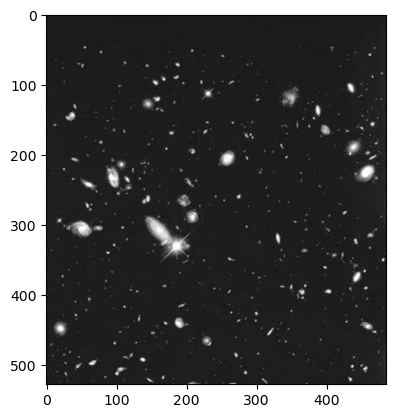

In [16]:
file = 'images/hubble.tif'
img  = Image.open(file)

print('formato:', img.format)
print('(ancho, alto) =', img.size)
print('modo: ', img.mode)

plt.imshow(img, cmap='gray')

In [17]:
from skimage import exposure

In [18]:
print(type(img))

img_np = np.array(img) #, dtype='uint8')

print(type(img_np), img_np.dtype)


<class 'PIL.TiffImagePlugin.TiffImageFile'>
<class 'numpy.ndarray'> uint8


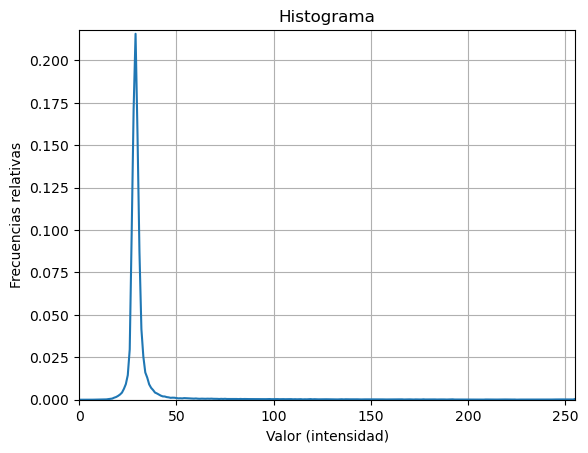

In [19]:
img_hist, bins = exposure.histogram(img_np, normalize=True)

plt.plot(bins, img_hist)
plt.axis([0,255, 0, 1.01*img_hist.max()])
plt.title('Histograma')
plt.xlabel('Valor (intensidad)')
plt.ylabel('Frecuencias relativas')
plt.grid()

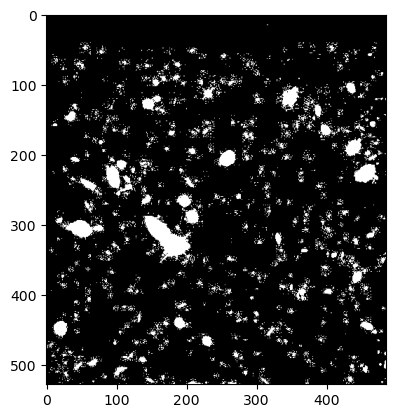

In [20]:
th1, th2 = 25, 45

mask = np.logical_not(np.logical_and(img_np >=th1, img_np <= th2))

plt.imshow(mask, cmap='gray')

In [21]:
img_filt = uniform_filter(img_np, 15)

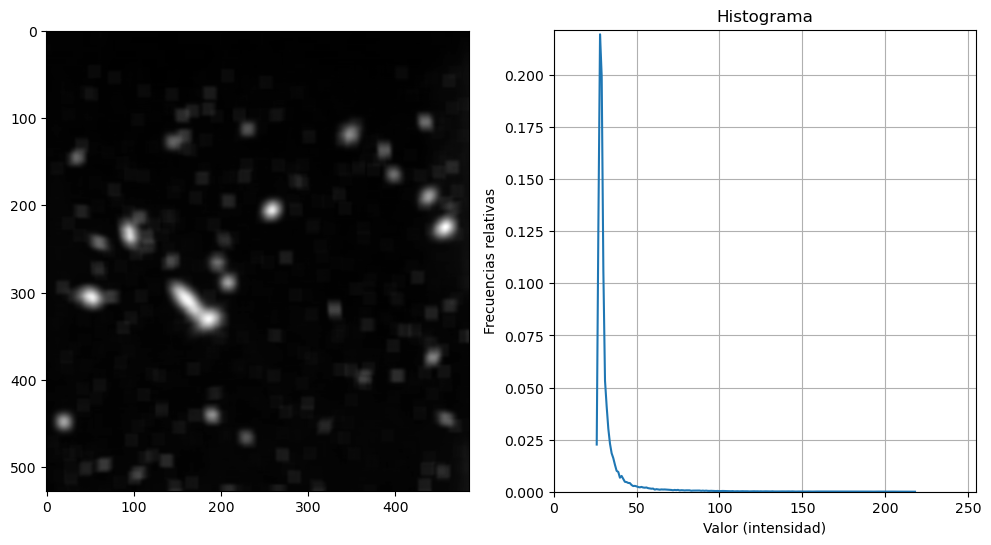

In [22]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(img_filt, cmap='gray')

plt.subplot(122)
img_hist, bins = exposure.histogram(img_filt, normalize=True)

plt.plot(bins, img_hist)
plt.axis([0,255, 0, 1.01*img_hist.max()])
plt.title('Histograma')
plt.xlabel('Valor (intensidad)')
plt.ylabel('Frecuencias relativas')
plt.grid()

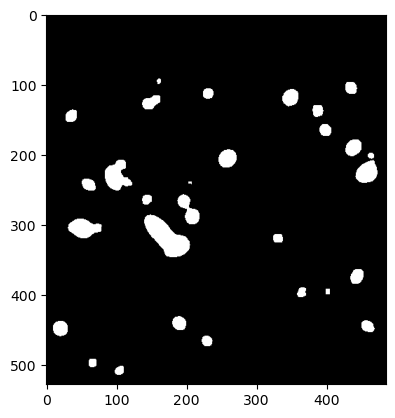

In [23]:
th1, th2 = 60, 45

mask = img_filt >=th1
#mask = np.logical_and(img_filt >=th1, img_filt <= th2)

plt.imshow(mask, cmap='gray')

## Limitaciones del filtrado lineal y filtros no lineales

Intentemos eliminar el ruido "sal y pimienta" de la siguiente imagen con un filtro uniforme o con uno gaussiano. ¿Qué pasa?

formato: TIFF
(ancho, alto) = (455, 440)
modo:  L


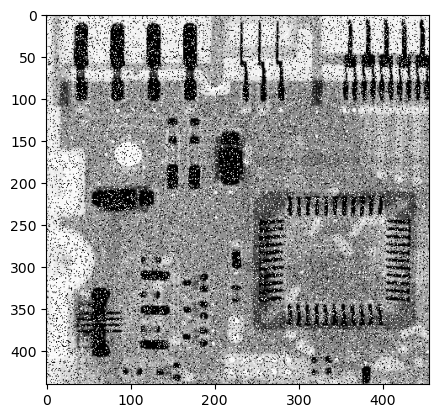

In [24]:
file = 'images/salted_board.tif'
img  = Image.open(file)

print('formato:', img.format)
print('(ancho, alto) =', img.size)
print('modo: ', img.mode)

plt.imshow(img, cmap='gray')

Text(0.5, 1.0, 'F. Gaussiano - Desviación típica: 1')

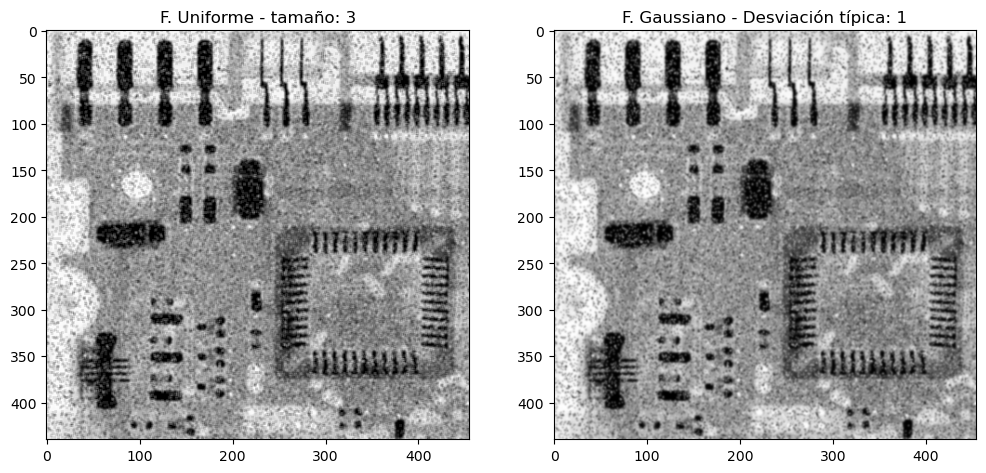

In [25]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(uniform_filter(img, 3), cmap='gray')
plt.title('F. Uniforme - tamaño: 3')

plt.subplot(122)
plt.imshow(gaussian_filter(img, 1), cmap='gray')
plt.title('F. Gaussiano - Desviación típica: 1')

Utilizaremos ahora un filtro de mediana

Text(0.5, 1.0, 'F. Mediana - tamaño: 5')

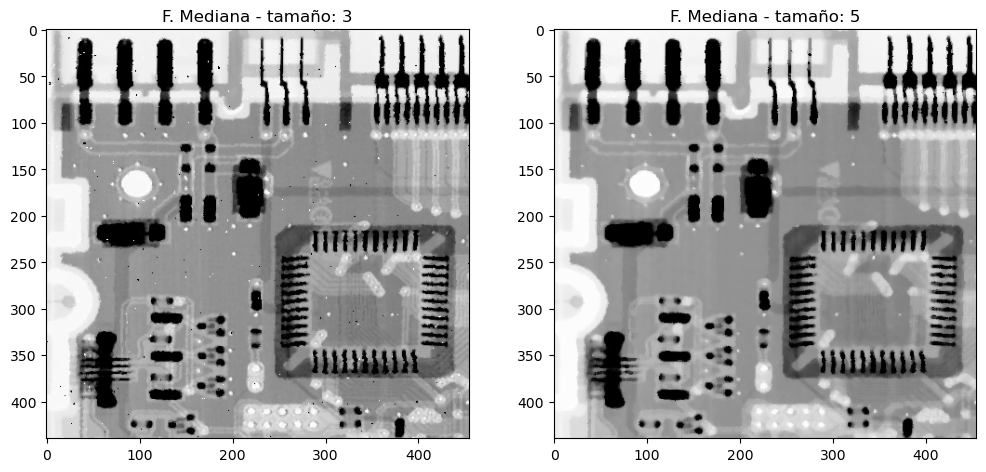

In [26]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(median_filter(img, 3), cmap='gray')
plt.title('F. Mediana - tamaño: 3')

plt.subplot(122)
plt.imshow(median_filter(img, 5), cmap='gray')
plt.title('F. Mediana - tamaño: 5')

## Unsharp Masking

formato: TIFF
(ancho, alto) = (320, 138)
modo:  L


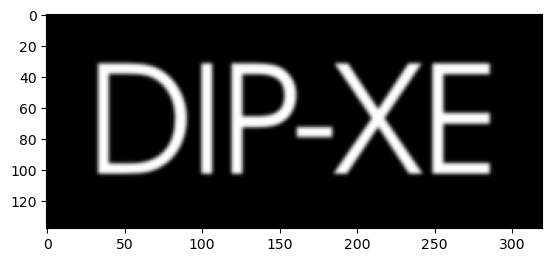

In [13]:
file = 'images/DIP-XE_text.tif'
img  = Image.open(file)

print('formato:', img.format)
print('(ancho, alto) =', img.size)
print('modo: ', img.mode)

plt.figure()
plt.imshow(img, cmap='gray')

img = np.array(img, dtype='float')
img = img/255

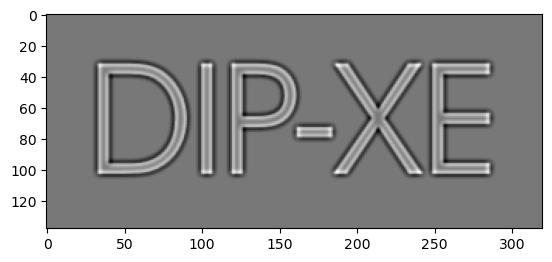

In [21]:
img_mask = img - uniform_filter(img, 3)

plt.figure()
plt.imshow(img_mask, cmap='gray')

mínimo:  0.14379084967320302 	máximo:  1.0470588235294112
mínimo normalizada:  0.2414928649835353 	máximo normalizada:  1.0


Text(0.5, 1.0, 'Original')

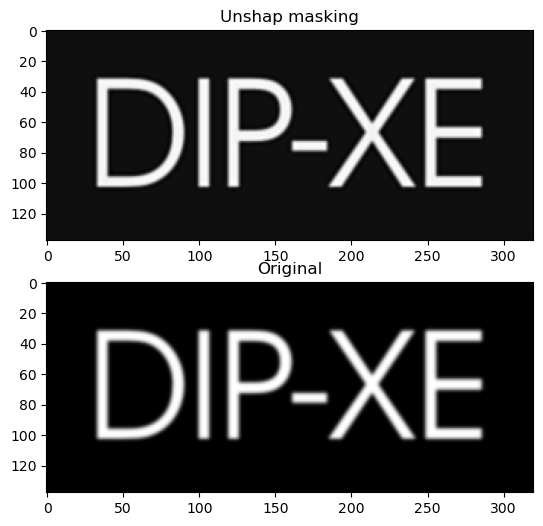

In [23]:
k = 2

img_unsharp = img + k*img_mask

M = img_unsharp.max()
m = img_unsharp.min()
                    
print('mínimo: ', m, '\tmáximo: ', M)

img_unsharp_norm = (img_unsharp + abs(m))/(abs(m) + M)
print('mínimo normalizada: ', img_unsharp_norm.min(), '\tmáximo normalizada: ', 
      img_unsharp_norm.max())
                    
plt.figure(figsize=(12, 6))

plt.subplot(211)
plt.imshow(img_unsharp_norm, cmap='gray')
##plt.imshow((img_unsharp+np.abs(m))/(np.abs(m)+M), cmap='gray')
plt.title('Unshap masking')

plt.subplot(212)
plt.imshow(img, cmap='gray')
plt.title('Original')


## Operadores de gradiente

### Filtros de Prewitt, de Sobel, y Derivada de Gaussiana 

formato: JPEG
(ancho, alto) = (640, 480)
modo:  L


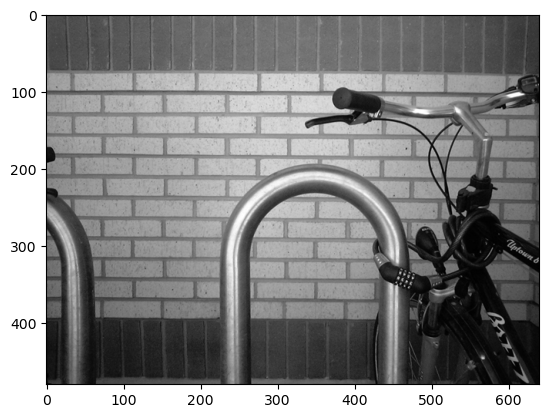

In [24]:
img = Image.open('images/Bikesgray.jpg')

print('formato:', img.format)
print('(ancho, alto) =', img.size)
print('modo: ', img.mode)

plt.figure()
plt.imshow(img, cmap='gray')

img = np.array(img, dtype='float')
img = img/255

### Prewitt

In [26]:
gx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
gy = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

In [27]:
img_gx = convolve(img, gx)
img_gy = convolve(img, gy)

img_prewitt = np.sqrt(img_gx**2 + img_gy**2)

Text(0.5, 1.0, 'Parcial en y')

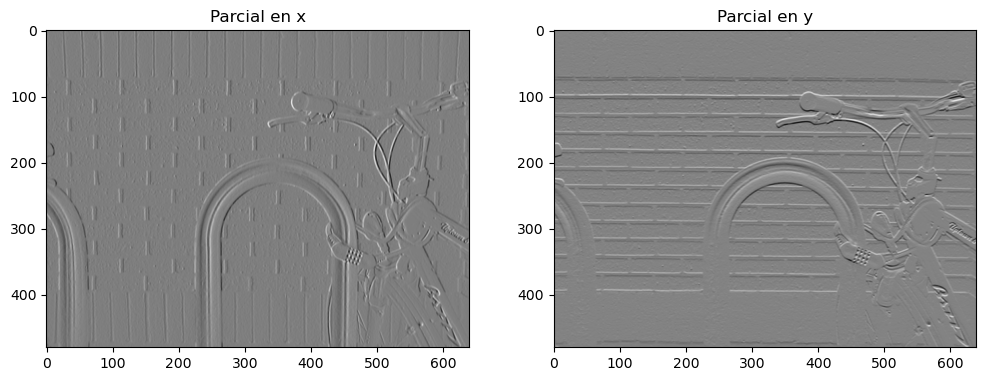

In [28]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(img_gx/img_gx.max(), cmap='gray')
plt.title('Parcial en x')

plt.subplot(122)
plt.imshow(img_gy/img_gy.max(), cmap='gray')
plt.title('Parcial en y')

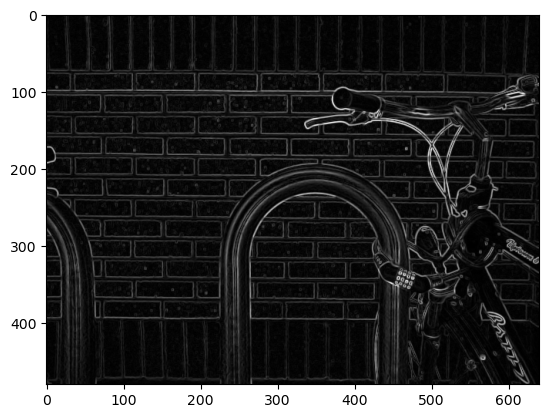

In [30]:
plt.imshow(img_prewitt/img_prewitt.max(), cmap='gray')

Text(0.5, 1.0, 'Parcial en y')

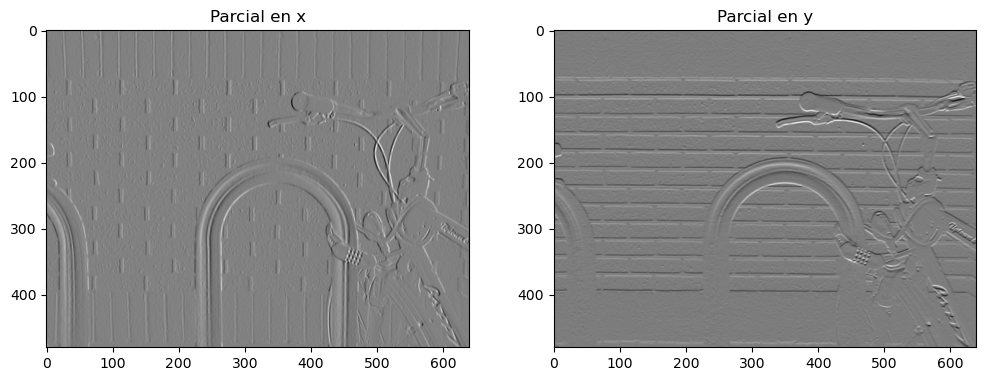

In [31]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(prewitt(img,1), cmap='gray')
plt.title('Parcial en x')

plt.subplot(122)
plt.imshow(prewitt(img,0), cmap='gray')
plt.title('Parcial en y')

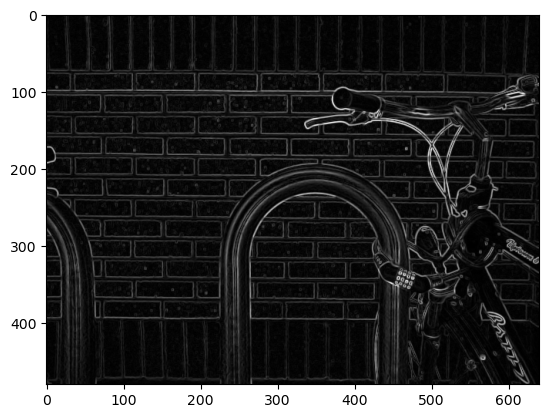

In [32]:
plt.imshow(filters.prewitt(img), cmap='gray')

formato: TIFF
(ancho, alto) = (500, 500)
modo:  L


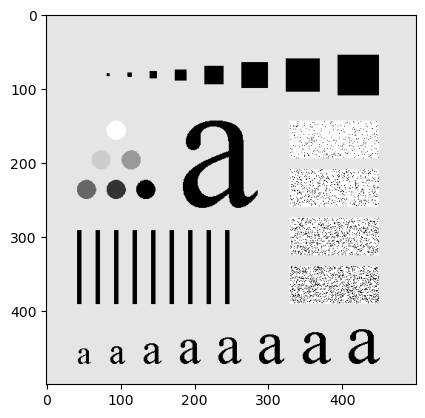

In [34]:
file = 'images/blurring_pattern.tif'
img  = Image.open(file)

print('formato:', img.format)
print('(ancho, alto) =', img.size)
print('modo: ', img.mode)

plt.imshow(img, cmap='gray')

img = np.array(img, dtype='float')
img = img/255

In [35]:
img_gx = convolve(img, gx)
img_gy = convolve(img, gy)

img_prewitt = img_gx + img_gy

Text(0.5, 1.0, 'Parcial en y')

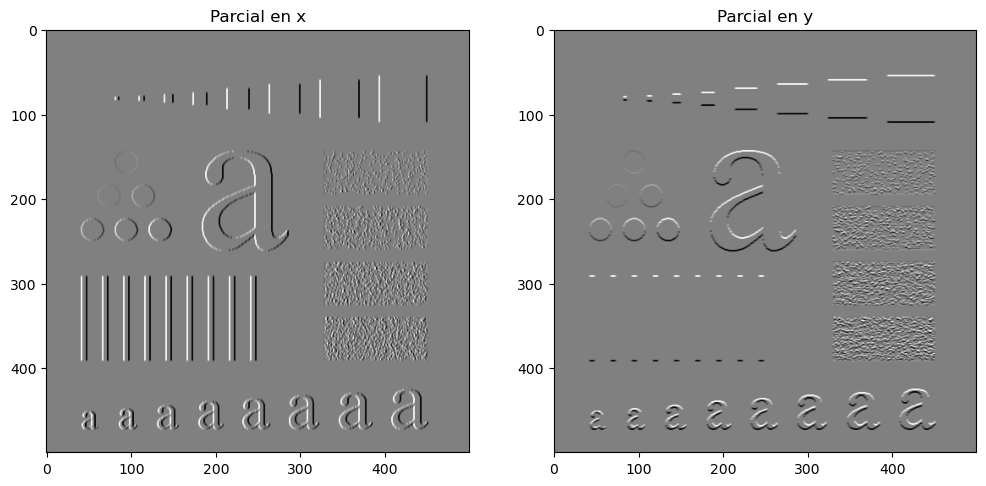

In [36]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(img_gx/img_gx.max(), cmap='gray')
plt.title('Parcial en x')

plt.subplot(122)
plt.imshow(img_gy/img_gy.max(), cmap='gray')
plt.title('Parcial en y')

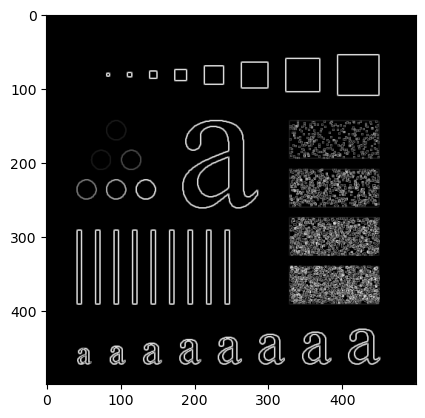

In [41]:
plt.imshow(filters.prewitt(img), cmap='gray')

### Sobel

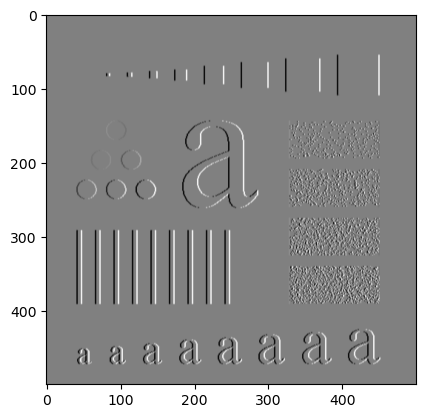

In [37]:
plt.imshow(sobel(img),cmap='gray')

Text(0.5, 1.0, 'Sobel')

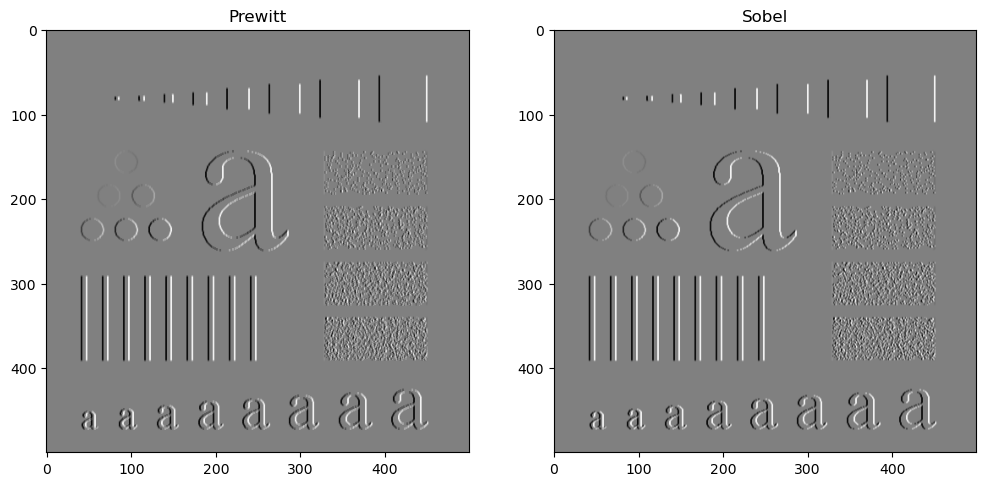

In [38]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(prewitt(img), cmap='gray')
plt.title('Prewitt')

plt.subplot(122)
plt.imshow(sobel(img), cmap='gray')
plt.title('Sobel')

### Derivada de Gaussiana

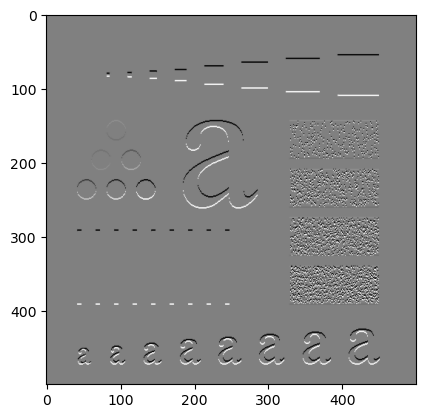

In [39]:
plt.imshow(gaussian_filter(img, 0.4, (1,0)), cmap='gray')

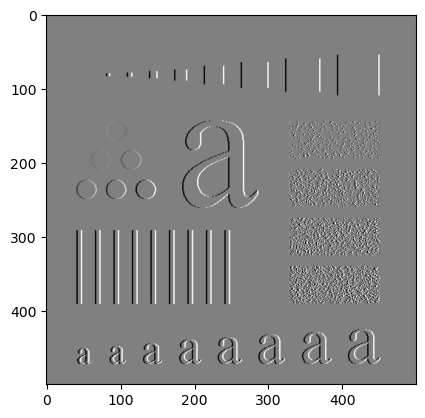

In [40]:
plt.imshow(gaussian_filter(img, 0.4, (0,1)), cmap='gray')

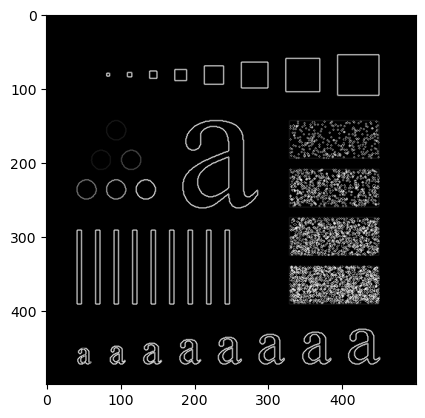

In [44]:
plt.imshow(np.sqrt(gaussian_filter(img, 0.4, (0,1))**2+
           gaussian_filter(img, 0.4, (1,0))**2), cmap='gray')

## Segundas derivadas: Laplacianas

formato: TIFF
(ancho, alto) = (466, 540)
modo:  L


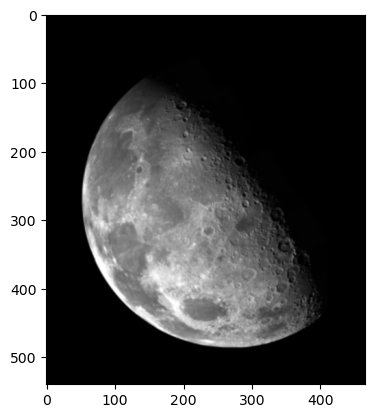

In [2]:
file = 'images/moon.tif'
img  = Image.open(file)

print('formato:', img.format)
print('(ancho, alto) =', img.size)
print('modo: ', img.mode)

plt.imshow(img, cmap='gray')

img = np.array(img, dtype='float')
img = img/img.max()

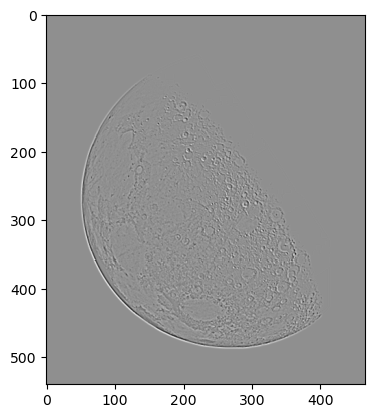

In [4]:
img_lpl = laplace(img)
plt.imshow(img_lpl, cmap='gray')

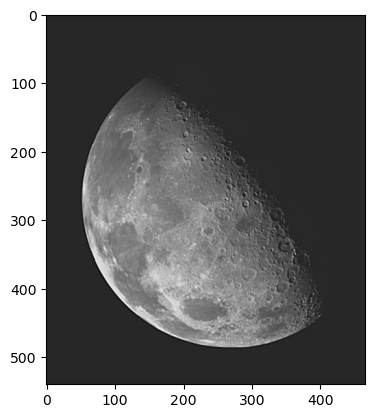

In [9]:
alpha=1 #Cambiar valor de alpha para ver efecto
img_realz = img - alpha*img_lpl

plt.imshow(img_realz, cmap='gray')

Text(0.5, 1.0, 'Realzada')

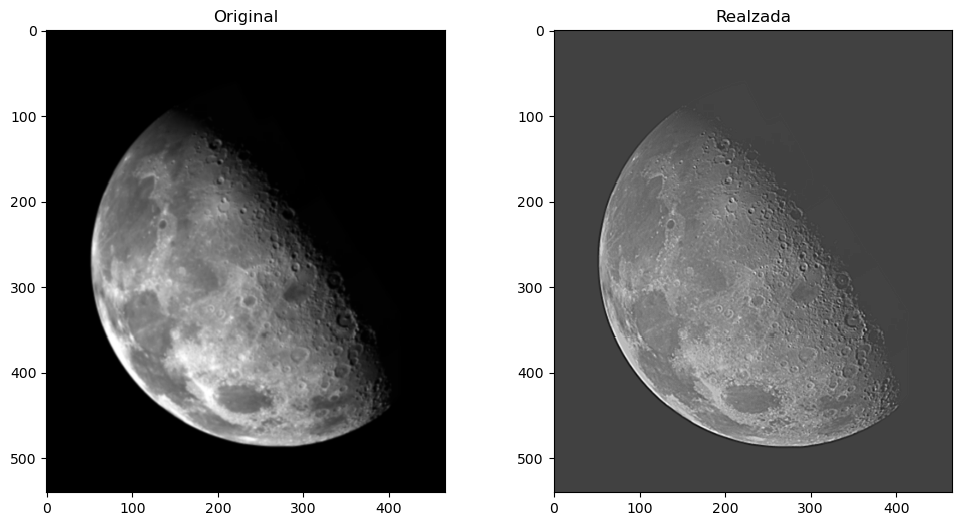

In [7]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original')

plt.subplot(122)
plt.imshow(img_realz, cmap='gray')
plt.title('Realzada')

## Detección de bordes con scikit-learn

In [10]:
from skimage.data import camera

image = camera()
edge_roberts = filters.roberts(image)
edge_sobel = filters.sobel(image)

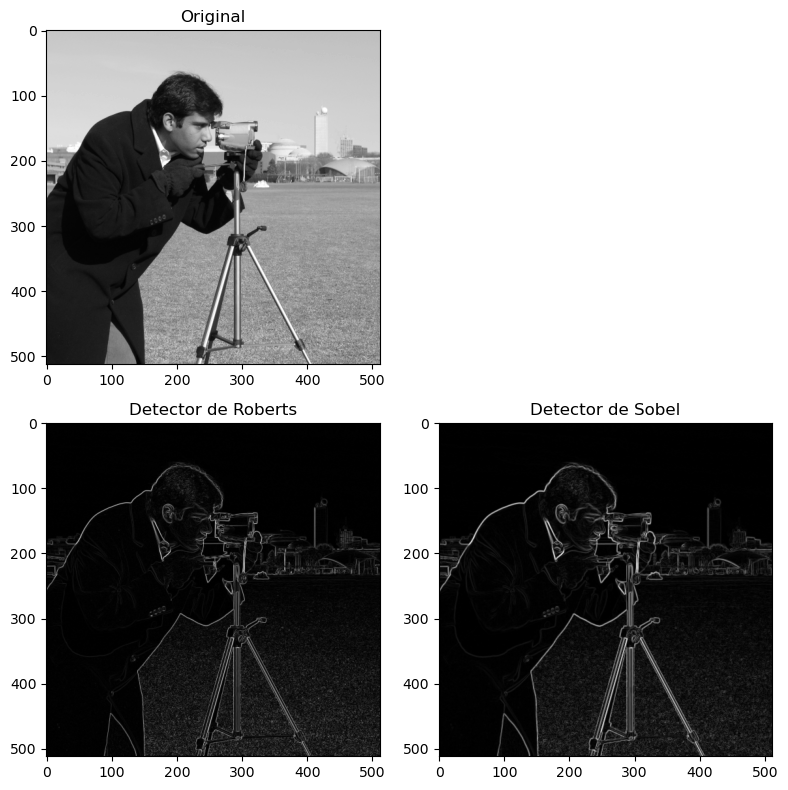

In [11]:
plt.figure(figsize=(8, 8))


plt.subplot(221)
plt.imshow(image, cmap='gray')
plt.title('Original')


plt.subplot(223)
plt.imshow(edge_roberts, cmap='gray')
plt.title('Detector de Roberts')

plt.subplot(224)
plt.imshow(edge_sobel, cmap='gray')
plt.title('Detector de Sobel')

plt.tight_layout()
plt.show()

## Detector de Canny

In [12]:
# Generate noisy image of a square
image = np.zeros((128, 128), dtype=float)
image[32:-32, 32:-32] = 1

In [13]:
image = rotate(image, 15, mode='constant')
image = gaussian_filter(image, 4)
image = random_noise(image, mode='speckle', mean=0.1)

In [14]:
# Compute the Canny filter for two values of sigma
edges1 = feature.canny(image)
edges2 = feature.canny(image, sigma=3)

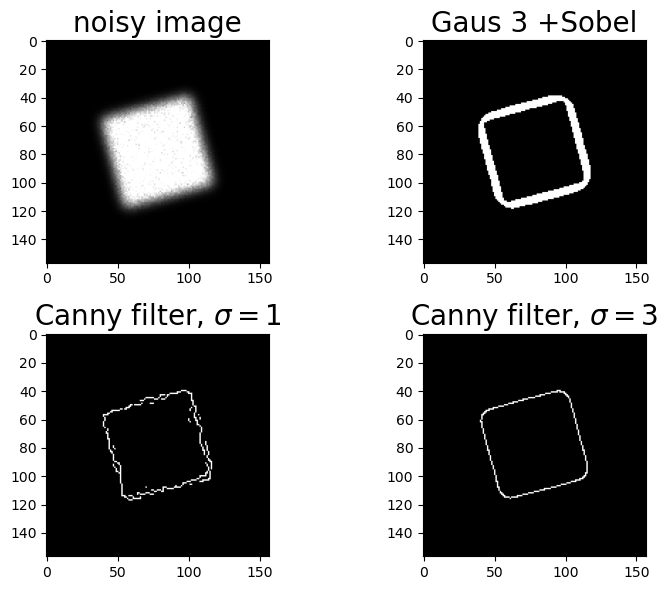

In [42]:
plt.figure(figsize=(8, 6))

plt.subplot(221)
plt.imshow(image, cmap='gray')
plt.title('noisy image', fontsize=20)

plt.subplot(222)
plt.imshow(np.logical_not(filters.sobel(gaussian_filter(image,3))<0.1), cmap='gray')
plt.title('Gaus 3 +Sobel', fontsize=20)

plt.subplot(223)
plt.imshow(edges1, cmap='gray')
plt.title(r'Canny filter, $\sigma=1$', fontsize=20)

plt.subplot(224)
plt.imshow(edges2, cmap='gray')
plt.title(r'Canny filter, $\sigma=3$', fontsize=20)

plt.tight_layout()
plt.show()